<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=200 alt=" ">  

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|14 de mayo 2020|

# Predicción de precios cryptomoneda  
---

**Autor**: [Computer Science](https://everythingcomputerscience.com/)  
**Descripción**:  
Este es un programa en python para predecir el precio de la cryptomoneda Bitcoin(30 días)

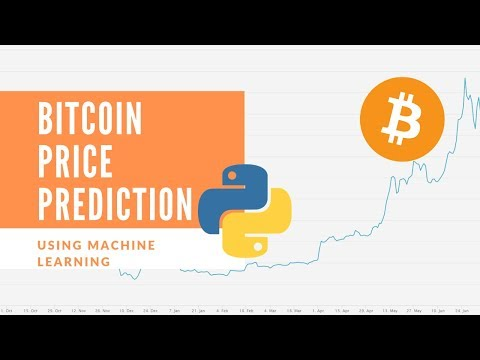

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('AaEbtnplqjw')

---  
### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Cargar el Dataset Bitcoin.csv  
[dataset](https://datahub.io/cryptocurrency/bitcoin)

In [2]:
df = pd.read_csv('bitcoin.csv')
df.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [3]:
df.shape

(3605, 16)

### Datacleaning  
1. [x] Verificar los datos nulos  
1. [x] eliminar registros nulos de la columna de precios  
1. [x] seleccionar la columna de precios  
1. [x] crear columna de predición

In [5]:
df.isna().sum()

date                        0
txVolume(USD)            1570
adjustedTxVolume(USD)    1570
txCount                     0
marketcap(USD)           1570
price(USD)               1570
exchangeVolume(USD)      1570
generatedCoins              0
fees                        0
activeAddresses             0
averageDifficulty           0
paymentCount              254
medianTxValue(USD)       1570
medianFee                 254
blockSize                   0
blockCount                  0
dtype: int64

In [7]:
datos = df[df['price(USD)'].notnull()]
datos = datos[['price(USD)']]
datos.reset_index
datos.head()

,price(USD)
1570,135.30
1571,134.44
1572,144.00
1573,139.00
1574,116.38


In [8]:
datos.shape

(2035, 1)

### Visualización de los datos

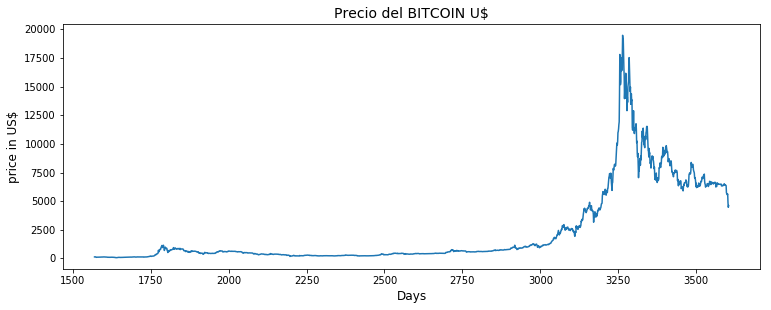

In [18]:
plt.figure(figsize=(12.5,4.5))
plt.plot(datos)
plt.title("Precio del BITCOIN U$", size = 14)
plt.xlabel("Days", size = 12)
plt.ylabel("price in US$", size = 12)
plt.show()

In [24]:
# crear variable de predicción
pred_days = 30
#crear la columna en el df
datos['predictions'] = datos[['price(USD)']].shift(-pred_days)

In [25]:
#Verificamos las ultimas columnas para ver que los datos a predecir
datos.tail()

,price(USD),predictions
3600,5559.74,NaN
3601,5620.78,NaN
3602,4863.93,NaN
3603,4465.54,NaN
3604,4611.57,NaN


### Feature and Response (X and y)

In [26]:
#Feature(X), Response(y)
X= datos.drop('predictions', axis = 'columns').values
y = datos.predictions.values

#remover los ultmos 30 registros de X and y
X = X[:len(datos)-pred_days]
y = y [: -pred_days]
X.shape, y.shape

((2005, 1), (2005,))

### Datos a predicir 30days

In [30]:
a_predecir = datos.drop('predictions', axis='columns')[-pred_days :].values

### Dividir los datos en entrenamiento y test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

### Modelo o estimador SVR

In [32]:
from sklearn.svm import SVR
svr = SVR(gamma=0.00001, C= 1e3)
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
#predecir
y_pred = svr.predict(X_test)
resultados = pd.DataFrame({'Datos_testeo': y_test, 'Predict': y_pred})
resultados.head(15)

,Datos_testeo,Predict
0,11475.30,8542.077052
1,7500.90,8302.675689
2,126.76,121.267618
3,1897.37,1657.363286
4,593.97,540.132093
5,231.89,233.601848
6,678.20,510.955677
7,250.82,250.944314
8,902.44,783.741795
9,281.15,380.641871


### Evaluacion del modelo

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8524165469198821

### Predecir los 30 días

In [35]:
y30_pred = svr.predict(a_predecir)

### Agregar las predicciones al archivo

In [36]:
data = datos.tail(pred_days)
data['y_30_days'] = y30_pred

#eiminar columna
data.drop('predictions',axis= 1, inplace=True)
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price(USD),y_30_days
3575,6478.89,6352.168011
3576,6484.65,6357.422550
3577,6468.44,6342.738393
3578,6480.84,6353.945592
3579,6482.66,6355.606315
3580,6492.35,6364.427721
3581,6337.04,6369.463431
3582,6336.99,6369.573291
3583,6318.14,6418.628122
3584,6378.92,6311.725046


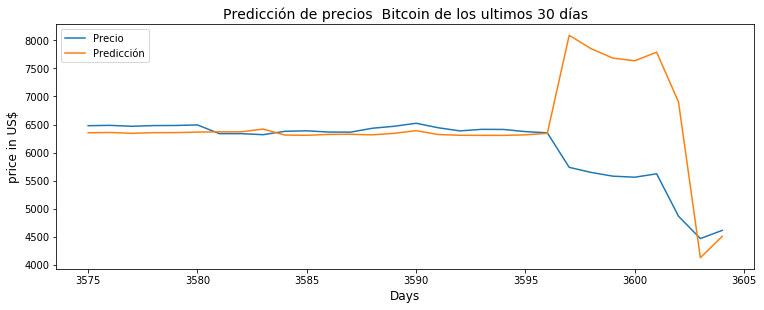

In [46]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data['price(USD)'], label= 'Precio')
plt.plot(data.y_30_days,  label= 'Predicción')
plt.title("Predicción de precios  Bitcoin de los ultimos 30 días", size = 14)
plt.xlabel("Days", size = 12)
plt.ylabel("price in US$", size = 12)
plt.legend(loc = 'upper left')
plt.show()

---  
**Nota**:  
Luego de terminar este proceso puede exportar los datos a un archivo de excel o csv  

```python
data.to_csv('nombre.csv')  
data.to_excel('nombre.xlsx')
```  
---